In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    classification_report
)
from scipy.sparse import issparse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pickle

In [46]:
# read from local
# X_train = pd.read_csv("../../Data/X_train.csv")
# X_test = pd.read_csv("../../Data/X_test.csv")
# y_train = pd.read_csv("../../Data/y_train.csv")
# y_test = pd.read_csv("../../Data/y_test.csv")

In [2]:
# read from goole drive
indir = '../../Data/GoogleDrive/'
X_train = indir + 'X_train.parquet'
X_test = indir + 'X_test.parquet'
y_train = indir + 'y_train.parquet'
y_test = indir + 'y_test.parquet'
# read the data sets
X_train = pd.read_parquet(X_train)
X_test = pd.read_parquet(X_test)
y_train = pd.read_parquet(y_train)
y_test = pd.read_parquet(y_test)

In [3]:
# drop the first column
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]
y_train = y_train["HadHeartDisease"]
y_test = y_test["HadHeartDisease"]

# convert the y values to 1D array and 0,1 
y_train = pd.get_dummies(y_train, drop_first=True).astype(int)
y_test = pd.get_dummies(y_test, drop_first=True).astype(int)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
# threads = os.cpu_count() - 2

In [4]:
X_train_nostate = X_train.iloc[:, 54:]
X_test_nostate = X_test.iloc[:, 54:]

X_train_nostate.shape

(121584, 66)

### trying to redo the state column

In [42]:
# df = pd.read_csv("../../Data/heart_2022_with_nans.csv")
# df['HadHeartDisease'] = np.where(
#     (df['HadHeartAttack'] == 'Yes') | 
#     (df['HadStroke'] == 'Yes') | 
#     (df['HadAngina'] == 'Yes'),
#     'Yes',
#     np.where(
#         df['HadHeartAttack'].isnull() | 
#         df['HadStroke'].isnull() | 
#         df['HadAngina'].isnull(),
#         None,
#         'No'
#     )
# )
# # group by state and get cound for HadHeartDisease
# heart_state = df.groupby('State')['HadHeartDisease'].value_counts().unstack().fillna(0)
# heart_state['ratio'] = heart_state['Yes'] / (heart_state['Yes'] + heart_state['No'])

In [43]:
# heart_state.sort_values(by='ratio', ascending=False).head(15)

HadHeartDisease,No,Yes,ratio
State,,,
Arkansas,4266,945,0.181347
West Virginia,4038,867,0.176758
Alabama,3709,760,0.170060
Florida,11142,2078,0.157186
Oklahoma,4794,863,0.152554
Kentucky,3380,607,0.152245
Tennessee,4440,755,0.145332
Ohio,13972,2334,0.143137
Louisiana,4753,790,0.142522


In [45]:
# heart_state.sort_values(by='ratio', ascending=False).tail(15)

HadHeartDisease,No,Yes,ratio
State,,,
Washington,23182,2683,0.103731
New York,15763,1786,0.101772
Puerto Rico,4933,558,0.101621
Idaho,5573,627,0.101129
Minnesota,15059,1615,0.096857
Hawaii,6948,739,0.096136
Connecticut,8738,918,0.095070
Massachusetts,9883,1024,0.093885
New Jersey,7373,744,0.091659


### Backward Selection with logistic regression

In [ ]:
# backward selection
from sklearn.feature_selection import SequentialFeatureSelector
b_logi = LogisticRegression(max_iter = 300,
                            solver = 'liblinear')
back_selector = SequentialFeatureSelector(b_logi, direction = 'backward', 
                                          scoring = 'f1')
back_selector.fit(X_train, y_train)


In [15]:
selected_features = back_selector.get_feature_names_out()
print(selected_features)
print(len(selected_features))

['onehot__State_California' 'onehot__State_Colorado'
 'onehot__State_Connecticut' 'onehot__State_Georgia'
 'onehot__State_Hawaii' 'onehot__State_Idaho' 'onehot__State_Iowa'
 'onehot__State_Kansas' 'onehot__State_Louisiana' 'onehot__State_Maryland'
 'onehot__State_Michigan' 'onehot__State_Minnesota'
 'onehot__State_Montana' 'onehot__State_Nebraska'
 'onehot__State_New Jersey' 'onehot__State_New Mexico'
 'onehot__State_New York' 'onehot__State_North Dakota'
 'onehot__State_Puerto Rico' 'onehot__State_Rhode Island'
 'onehot__State_South Carolina' 'onehot__State_Texas' 'onehot__State_Utah'
 'onehot__State_Vermont' 'onehot__State_Virginia'
 'onehot__State_Washington' 'onehot__State_Wisconsin' 'onehot__Sex_Female'
 'onehot__PhysicalActivities_Yes' 'onehot__HadAsthma_Yes'
 'onehot__HadSkinCancer_Yes' 'onehot__HadCOPD_No'
 'onehot__HadDepressiveDisorder_No' 'onehot__HadKidneyDisease_No'
 'onehot__HadArthritis_Yes' 'onehot__HadDiabetes_No'
 'onehot__HadDiabetes_No, pre-diabetes or borderline di

In [40]:
# saving the selection model
pickle.dump(back_selector, open(indir + 'back_selection.pkl', 'wb'))

In [4]:
# import the backward selection model
back_selector = pickle.load(open(indir + 'back_selection.pkl', 'rb'))

# train the model with selected features
X_train_selected = back_selector.transform(X_train)
X_test_selected = back_selector.transform(X_test)

/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator SequentialFeatureSelector from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Logistic Regression

In [6]:
roc_auc_scorer = make_scorer(roc_auc_score,
                             needs_threshold = True,
                             multi_class = 'ovo')

# define a tuning grid for logistic regression
logi_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear', 'saga'],
    'clf__class_weight': [None, 'balanced'],
}


# define a logistic regression model
log_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter = 1000))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 69)

# define a grid search with cross-validation
log_grid_search = GridSearchCV(estimator = log_pipe,
                               param_grid = logi_grid,
                               cv = cv,
                               scoring = roc_auc_scorer,
                               n_jobs = -1,
                               verbose = 0)

# fit the grid search
log_grid_search.fit(X_train_selected, y_train)

# print the best parameters
print("Best parameters:", log_grid_search.best_params_)
print("Best cross-validation ROC AUC score: {:.2f}".format(log_grid_search.best_score_))

Best parameters: {'clf__C': 0.01, 'clf__class_weight': 'balanced', 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best cross-validation ROC AUC score: 0.84


Best parameters: {'clf__C': 0.001, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}  
Best cross-validation ROC AUC score: 0.84

In [11]:
# fit the training data with the best logistic regression model
log_final = LogisticRegression(
    C = 0.001,
    class_weight = None,
    penalty = 'l2',
    solver = 'liblinear'
)
log_final.fit(X_train, y_train)

/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.001, solver='liblinear')

### Logistic Regression Test Performance

In [7]:
# y_pred_test_logi = log_final.predict(X_test)
# y_pred_train_logi = log_final.predict(X_train)
y_pred_test_logi = log_grid_search.best_estimator_.predict(X_test_selected)
y_pred_train_logi = log_grid_search.best_estimator_.predict(X_train_selected)

# y_pred_test_logi = log_grid_search.best_estimator_.predict(X_test_nostate)
# y_pred_train_logi = log_grid_search.best_estimator_.predict(X_train_nostate)

# create classification report
logi_report  = classification_report(y_test, y_pred_test_logi, 
                                     target_names = ['No_HeartDisease', 
                                                     'Yes_HeartDisease'])
# create confusion matrix
logi_conf = confusion_matrix(y_test, y_pred_test_logi)
logi_conf = pd.DataFrame(logi_conf, 
                         columns = ['predicted_no_heart_disease', 
                                    'predicted_heart_disease'],
                         index = ['no_heart_disease',
                                  'has_heart_disease'])
                                    

=========== Logistic Regression Classification Report ==========
                  precision    recall  f1-score   support

 No_HeartDisease       0.91      0.74      0.82     30396
Yes_HeartDisease       0.51      0.78      0.61     10132

        accuracy                           0.75     40528
       macro avg       0.71      0.76      0.72     40528
    weighted avg       0.81      0.75      0.77     40528

===================== Logistic Regression AUC score ===============
0.8427527462602218



Text(0.5, 1.0, ' Logistic Regression ROC curve')

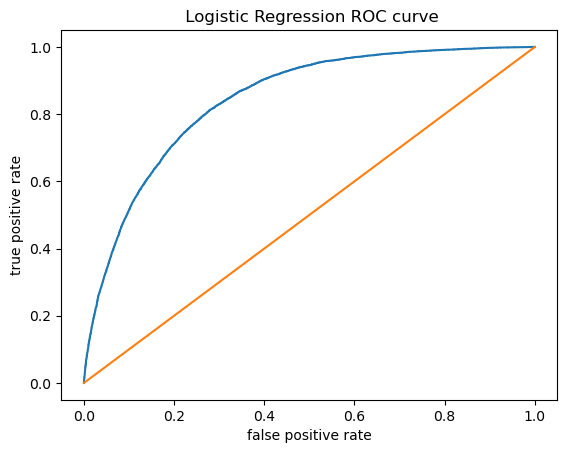

In [8]:
print('=========== Logistic Regression Classification Report ==========')
print(logi_report)
y_pred_prob_logi = log_grid_search.best_estimator_.predict_proba(X_test_selected)[:, 1]
# y_pred_prob_logi = log_final.predict_proba(X_test)[:, 1]
# plotting the ROC curve and printing the AUC score for the logistic model
print('===================== Logistic Regression AUC score ===============')
print(metrics.roc_auc_score(y_test,y_pred_prob_logi))
print('===================================================================\n')
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob_logi)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title(' Logistic Regression ROC curve')


=========== Logistic Regression Confusion Matrix ==========
                   predicted_no_heart_disease  predicted_heart_disease
no_heart_disease                        22619                     7777
has_heart_disease                        2180                     7952



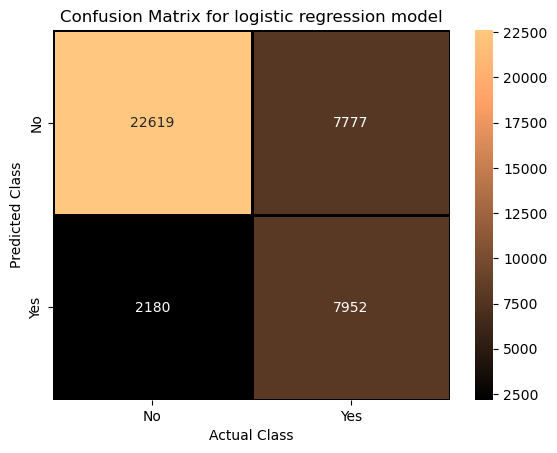

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_logi),
    annot = True,
    cmap = "copper",
    linewidths = 2,
    linecolor = "black",
    xticklabels = ['No','Yes'],
    yticklabels = ['No','Yes'],
    fmt = '.0F'
           )
plt.title('Confusion Matrix for logistic regression model')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

print('=========== Logistic Regression Confusion Matrix ==========')
print(logi_conf)
print('==========================================================\n')


In [17]:
X_train_selected = pd.DataFrame(X_train_selected, columns = selected_features)

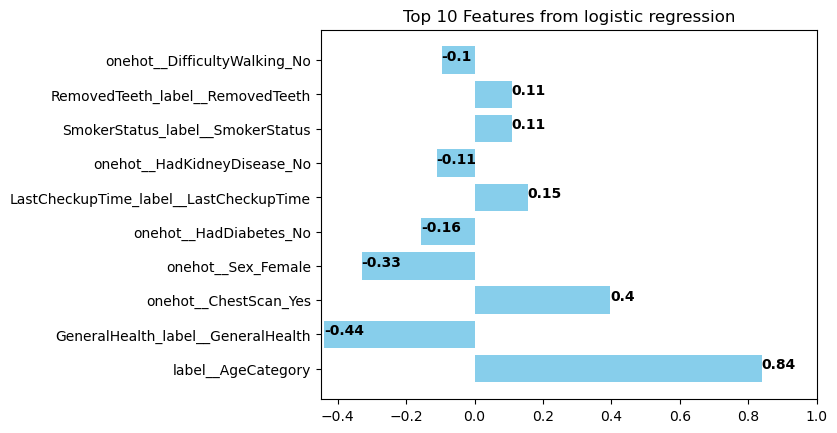

In [18]:
# Getting coefficients
log_final = log_grid_search.best_estimator_.named_steps['clf']
logi_coef = log_final.coef_
avg_coef = np.mean(logi_coef, axis=0)

# create a dictionary for coefficients and column names
# coef_dict = {}
# for coef, col in zip(avg_coef, X_train.columns):
#     coef_dict[col] = coef
coef_dict = {}
for coef, col in zip(avg_coef, X_train_selected.columns):
    coef_dict[col] = coef

# sort the dictionary by the absolute value of the coefficients
sorted_dict = dict(sorted(coef_dict.items(), 
                          key = lambda x: abs(x[1]), 
                          reverse = True))

# dataframe for the sorted dictionary with two columns
coef_df = pd.DataFrame(list(sorted_dict.items()), 
                       columns = ['Feature', 'Coefficient'])

# select the top 10 coefficients
coef_df = coef_df.head(10)
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')

# add text annotation on the bar
for i, v in enumerate(coef_df['Coefficient']):
    plt.text(v, i, str(round(v, 2)),
             color='black', fontweight='bold',
             ha = 'left') 
plt.title('Top 10 Features from logistic regression')
# set x limit
plt.xlim(-0.45, 1)
plt.size = (8,6)

### K-nearest Neighbors 

In [19]:
knn_param_grid = {
    'knn__n_neighbors': [1, 10, 20, 30],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 69)

knn_grid_search = GridSearchCV(knn_pipe,
                               knn_param_grid,
                               cv = cv,
                               verbose = 0,
                               scoring = roc_auc_scorer,
                               n_jobs = -1)

#knn_grid_search.fit(X_train, y_train)
knn_grid_search.fit(X_train_selected, y_train)

print("Best parameters:", knn_grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(knn_grid_search.best_score_))

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 30, 'knn__weights': 'uniform'}
Best cross-validation score: 0.82


In [75]:
#best_knn = knn_grid_search.best_estimator_
best_knn = KNeighborsClassifier(metric =  'manhattan', 
                                n_neighbors =  30, 
                                weights =  'distance')

best_knn.fit(X_train, y_train)

/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=30, weights='distance')

### KNN Test Performance

In [20]:
# y_pred_test_knn = best_knn.predict(X_test)
# y_pred_prob_knn = best_knn.predict_proba(X_test)[:, 1]

y_pred_test_knn = knn_grid_search.best_estimator_.predict(X_test_selected)
y_pred_prob_knn = knn_grid_search.best_estimator_.predict_proba(X_test_selected)[:, 1]

knn_report  = classification_report(y_test, y_pred_test_knn, 
                                     target_names = ['No_HeartDisease', 
                                                     'Yes_HeartDisease'])
# create confusion matrix
knn_conf = confusion_matrix(y_test, y_pred_test_knn)
knn_conf = pd.DataFrame(knn_conf, 
                         columns = ['predicted_no_heart_disease', 
                                    'predicted_heart_disease'],
                         index = ['no_heart_disease',
                                  'has_heart_disease'])

/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/hinnz/Downloads/anaconda3/envs/BIOSTAT203C-24S/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


=========== KNN Classification Report ==========
                  precision    recall  f1-score   support

 No_HeartDisease       0.81      0.95      0.87     30396
Yes_HeartDisease       0.67      0.32      0.43     10132

        accuracy                           0.79     40528
       macro avg       0.74      0.63      0.65     40528
    weighted avg       0.77      0.79      0.76     40528

===================== KNN AUC score ===============
0.8187211477272214



Text(0.5, 1.0, ' KNN ROC curve')

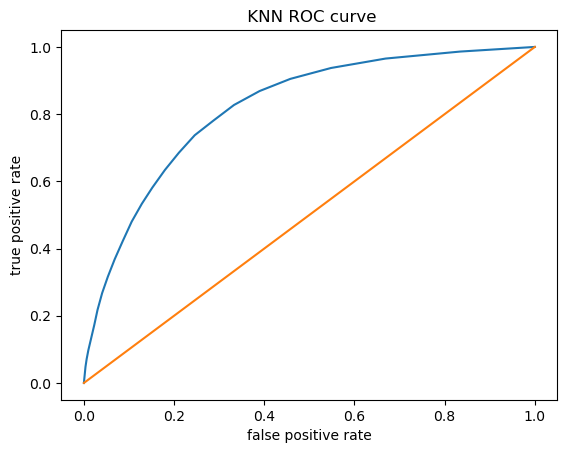

In [21]:
print('=========== KNN Classification Report ==========')
print(knn_report)
# plotting the ROC curve and printing the AUC score for the logistic model
print('===================== KNN AUC score ===============')
print(metrics.roc_auc_score(y_test,y_pred_prob_knn))
print('===================================================================\n')
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob_knn)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title(' KNN ROC curve')


=========== KNN Confusion Matrix ==========
                   predicted_no_heart_disease  predicted_heart_disease
no_heart_disease                        28787                     1609
has_heart_disease                        6931                     3201



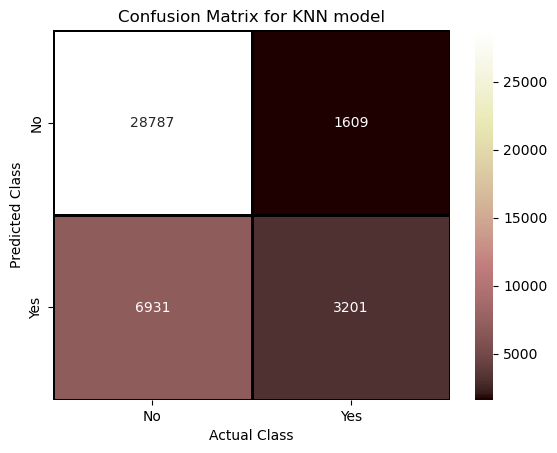

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_knn),
    annot = True,
    cmap = "pink",
    linewidths = 2,
    linecolor = "black",
    xticklabels = ['No','Yes'],
    yticklabels = ['No','Yes'],
    fmt = '.0F'
           )
plt.title('Confusion Matrix for KNN model')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')

print('=========== KNN Confusion Matrix ==========')
print(knn_conf)
print('==========================================================\n')

### Saving the CVs and y predicted values
- logi_cv : cross validation models for logistic regression
- knn_cv : cross validation models for knn
- test_predicted: predicted values from each model and the probabilities

In [22]:
# best_knn = knn_grid_search.best_estimator_.named_steps['knn']
# logi_final = log_grid_search.best_estimator_.named_steps['clf']

In [24]:
# save predicted values to a parquet file
out_dir = '../../Data/GoogleDrive/'
out_file = out_dir + 'test_predicted_hinn.parquet'

# save the logistic cross validation results and models
# logi_cv = log_grid_search.cv_results_
# logi_cv = pd.DataFrame(logi_cv)
# logi_cv.to_parquet(out_dir + 'logi_cv.parquet')

# save the knn cross validation results and models 
# knn_cv = knn_grid_search.cv_results_
# knn_cv = pd.DataFrame(knn_cv)
# knn_cv.to_parquet(out_dir + 'knn_cv.parquet')

test_predicted = pd.DataFrame({'logi_predicted': y_pred_test_logi,
                               'logi_predicted_prob': y_pred_prob_logi,
                               'knn_predicted': y_pred_test_knn,
                               'knn_predicted_prob': y_pred_prob_knn})



pickle.dump(log_final, open(indir + 'logi_model.pkl', 'wb'))
pickle.dump(best_knn, open(indir + 'knn_model.pkl', 'wb'))
test_predicted.to_parquet(out_file)

In [131]:
test_predicted

,logi_predicted,logi_predicted_prob,knn_predicted,knn_predicted_prob
0,0.0,0.005136,0.0,0.000000
1,0.0,0.009876,0.0,0.000000
2,0.0,0.038739,0.0,0.033403
3,0.0,0.276306,0.0,0.261445
4,0.0,0.150906,0.0,0.105530
...,...,...,...,...
98670,0.0,0.012116,0.0,0.000000
98671,0.0,0.076067,0.0,0.096332
98672,0.0,0.059932,0.0,0.097646
98673,0.0,0.114637,0.0,0.000000


In [85]:
# plot results
# cv_results = pd.DataFrame(knn_grid_search.cv_results_)
# uniform_results = cv_results[cv_results['param_knn__weights'] == 'uniform']
# plt.figure(figsize=(10, 7))
# plt.plot(uniform_results['param_knn__n_neighbors'], uniform_results['mean_train_score'], label='Train ROC AUC', marker='o')
# plt.plot(uniform_results['param_knn__n_neighbors'], uniform_results['mean_test_score'], label='Validation ROC AUC', marker='o')
# plt.title('KNN Performance Evaluation with Varying Neighbors')
# plt.xlabel('Number of Neighbors')
# plt.ylabel('ROC AUC')
# plt.legend()
# plt.grid(True)
# plt.show()